# Building the Models

## 1. Data Preprocessing

### 1.1. Importing the libraries and dataset

#### 1.1.1. Loading the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1.1.2. Importing the dataset

In [2]:
dataset_uncleaned = pd.read_csv('/Users/eseoseodion/Documents/Portfolio/Customer Churn Prediction/data/telco_customer_churn.csv')

### 1.2. Cleaning the data

#### 1.2.1. Converting 'TotalCharges' into a numeric column

In [3]:
dataset_uncleaned['TotalCharges'] = pd.to_numeric(dataset_uncleaned['TotalCharges'], errors='coerce')

#### 1.2.2. Dropping rows with NaN (missing) values

In [4]:
dataset = dataset_uncleaned.dropna()

#### 1.2.3. Confirming if there are still any missing values

In [5]:
# Check for missing values
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Dataset is now clean.

In [6]:
dataset.shape

(7032, 21)

In [7]:
numerical = dataset.select_dtypes(include=['number']).columns
categorical = dataset.select_dtypes(include=['object']).columns

print("Numerical columns:\n", numerical)
print("\nCategorical columns:\n", categorical)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [8]:
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner',
            'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 
            'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

for col in columns:
    print(f"Unique Values for the '{col}' Column")
    print(dataset[col].unique())
    print('=' * 50)

Unique Values for the 'customerID' Column
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values for the 'gender' Column
['Female' 'Male']
Unique Values for the 'SeniorCitizen' Column
[0 1]
Unique Values for the 'Partner' Column
['Yes' 'No']
Unique Values for the 'Dependents' Column
['No' 'Yes']
Unique Values for the 'tenure' Column
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Unique Values for the 'PhoneService' Column
['No' 'Yes']
Unique Values for the 'MultipleLines' Column
['No phone service' 'No' 'Yes']
Unique Values for the 'InternetService' Column
['DSL' 'Fiber optic' 'No']
Unique Values for the 'OnlineSecurity' Column
['No' 'Yes' 'No internet service']
Unique Values for the 'OnlineBackup' Column
['Yes' 'No' 'No internet service']
Unique Values for the 'DeviceProt

### 1.3. Feature Engineering

#### 1.3.1. Reducing redundancy and long labelling for improved readability

In [9]:
# Define columns and values to replace
cols_to_edit = {
    'MultipleLines': 'No phone service',
    ('OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'): 'No internet service'
}


# Replace "No phone/internet service" with "No"
for key, value in cols_to_edit.items():
    if isinstance(key, tuple):
        for col in key:
            dataset[col] = dataset[col].replace(value, 'No')
    else:
        dataset[key] = dataset[key].replace(value, 'No')


# Simplify PaymentMethod values
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace({
    'Electronic check': 'Automatic',
    'Mailed check': 'Manual',
    'Bank transfer (automatic)': 'Automatic',
    'Credit card (automatic)': 'Automatic',
})

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/186974147.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[key] = dataset[key].replace(value, 'No')
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/186974147.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].replace(value, 'No')
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/186974147.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

This simplification could reveal trends like:

- Manual payers being more likely to churn
- Electronic check users being riskier

#### 1.3.2. Addressing Skewness in 'MonthlyCharges' and 'TotalCharges'

Because both are right-skewed, the log1p transformation will be applied. 

In [10]:
dataset['MonthlyCharges_log'] = np.log1p(dataset['MonthlyCharges'])
dataset['TotalCharges_log'] = np.log1p(dataset['TotalCharges'])

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/2635752452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MonthlyCharges_log'] = np.log1p(dataset['MonthlyCharges'])
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/2635752452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TotalCharges_log'] = np.log1p(dataset['TotalCharges'])


#### 1.3.3. Binning tenure into categories for modelling

In [11]:
bins = [0, 12, 48, 72]
labels = ['Short term', 'Mid term', 'Long term']
dataset['tenure_bin'] = pd.cut(dataset['tenure'], bins=bins, labels=labels, right=False)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/4651080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tenure_bin'] = pd.cut(dataset['tenure'], bins=bins, labels=labels, right=False)


##### Notes
Perfect. This is a solid feature engineering step — binning makes trends more interpretable and sometimes improves tree-based model performance.

❓ "Should I keep the original column as well as the binned column?"

It depends on your goals:

✅ Keep both if:

    You're using a tree-based model (e.g., Random Forest, XGBoost) which handles numeric and categorical features well.

    You want to give the model both raw precision and a more interpretable abstraction.

🧹 Drop the original if:

    You’re using models that don’t handle raw numeric data well or that perform better with simplified inputs (like logistic regression).

    You want to reduce multicollinearity or complexity.

🔁 Recommendation: Try it both ways and evaluate model performance — that’s the best teacher.

#### 1.3.4. Calculating the 'EstimatedTotalCharges' vs 'TotalCharges'

In [12]:
dataset['EstimatedTotalCharges'] = dataset['MonthlyCharges'] * dataset['tenure']
dataset['EstimatedTotalCharges_log'] = np.log1p(dataset['EstimatedTotalCharges'])
dataset[['TotalCharges_log', 'EstimatedTotalCharges_log']]

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/1157451705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['EstimatedTotalCharges'] = dataset['MonthlyCharges'] * dataset['tenure']
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/1157451705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['EstimatedTotalCharges_log'] = np.log1p(dataset['EstimatedTotalCharges'])


,TotalCharges_log,EstimatedTotalCharges_log
0,3.429137,3.429137
1,7.544597,7.569051
2,4.692723,4.688592
3,7.518471,7.551975
4,5.028148,4.958640
...,...,...
7038,7.596643,7.618841
7039,8.904345,8.913470
7040,5.850621,5.788736
7041,5.728800,5.699105


#### 1.3.5. How far off is the reported TotalCharges from what we’d expect (MonthlyCharges * Tenure)?

- Positive charge_diff → They've paid more than expected (overpaid)
- Negative charge_diff → They've paid less than expected (maybe due to waived fees, discounts, or churn interruptions) (underpaid)

In [13]:
dataset['charge_diff'] = dataset['TotalCharges'] - dataset['EstimatedTotalCharges']
dataset[['charge_diff']]

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/1923603203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_diff'] = dataset['TotalCharges'] - dataset['EstimatedTotalCharges']


,charge_diff
0,0.00
1,-46.80
2,0.45
3,-62.75
4,10.25
...,...
7038,-44.70
7039,-67.50
7040,20.85
7041,9.00


Useful because:

- It may highlight billing issues, discounts, or partial months

- Could be a proxy for irregularity in the customer's payment history

#### 1.3.6. Was this customer undercharged or missing charges?

In [14]:
dataset['missing_charge_flag'] = (dataset['TotalCharges'] < dataset['EstimatedTotalCharges']) * 1

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/1717805244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['missing_charge_flag'] = (dataset['TotalCharges'] < dataset['EstimatedTotalCharges']) * 1


Useful because:

- Models like logistic regression or decision trees sometimes perform better with binary flags than continuous deltas

- It might signal customers just starting service, who are more likely to churn early

Try training your model with and without those features, and check:

- Accuracy / ROC AUC

- Feature importance (if using tree-based models)

- SHAP values (for interpretation)

#### 1.3.7. Combining 'Contract' & 'Tenure'

What does Contract tell us?
| Contract       | What it means                        |
| -------------- | ------------------------------------ |
| Month-to-month | Can cancel any time (low commitment) |
| One year       | Committed to 12 months               |
| Two year       | Committed to 24 months               |

What does Tenure tell us?
It shows how long they've already been a customer.
1 = just joined
12 = 1 year
36 = 3 years
etc.


What does combining them tell us?
“How long has this person stayed, relative to the contract they signed?”


| Contract       | Tenure | What it might mean              |
| -------------- | ------ | ------------------------------- |
| Month-to-month | 1      | Just joined, no loyalty yet     |
| Month-to-month | 36     | Loyal despite no long contract  |
| One year       | 12     | Finished one year contract      |
| One year       | 24     | Renewed once                    |
| Two year       | 3      | Just started long-term contract |


##### 1.3.7.1. Loyalty flag

In [15]:
dataset['contract_loyalty'] = (
    (dataset['Contract'] != 'Month-to-month') & 
    (dataset['tenure'] > 12)).astype(int)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/342980216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_loyalty'] = (


What it means:
- 1 → Has long contract and stayed over a year → likely loyal
- 0 → Either on month-to-month or hasn’t stayed long

##### 1.3.7.2. Contract Progress

In [16]:
def contract_length(contract):
    if contract == 'Month-to-month':
        return 1
    elif contract == 'One year':
        return 12
    elif contract == 'Two year':
        return 24
    
dataset['contract_length'] = dataset['Contract'].apply(contract_length)
dataset['contract_progress'] = (dataset['tenure'] / dataset['contract_length']).round(2)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/2309875274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_length'] = dataset['Contract'].apply(contract_length)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/2309875274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_progress'] = (dataset['tenure'] / dataset['contract_length']).round(2)


What it means:
- contract_progress = 1.0 → they finished their contract
- *>1.0 → they renewed
- <1.0 → still within contract

This gives a numeric signal to the model about where the customer is in their commitment journey.

#### 1.3.8. How many add-ons does a customer subscribe to

In [17]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

dataset['ServiceCount'] = (dataset[service_cols] == 'Yes').sum(axis=1)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/1284379579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ServiceCount'] = (dataset[service_cols] == 'Yes').sum(axis=1)


In [18]:
print(np.sort(dataset['ServiceCount'].unique()))

[0 1 2 3 4 5 6 7 8]


#### 1.3.9. How expensive was a customers service relative to how long they stuck around?

In [19]:
dataset['charge_tenure_ratio'] = (dataset['MonthlyCharges'] / (dataset['tenure'] + 1)).round(2)
dataset['charge_tenure_ratio_log'] = np.log1p(dataset['charge_tenure_ratio']).round(2)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/3202030509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_tenure_ratio'] = (dataset['MonthlyCharges'] / (dataset['tenure'] + 1)).round(2)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/3202030509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_tenure_ratio_log'] = np.log1p(dataset['charge_tenure_ratio']).round(2)


#### 1.3.10. Could a deeply engaged customer on a longer plan be less likely to leave? (Many Services + One‑year Contract)

- “Deeply engaged” → ServicesCount is high
- “On a longer plan” → Contract is either 'One year' or 'Two year'

What metric is used to decide when a customer is deeply engaged?

In [20]:
dataset['ServiceCount'].value_counts()

ServiceCount
1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
0      80
Name: count, dtype: int64

In [21]:
dataset['ServiceCount'].describe()

count    7032.000000
mean        3.363339
std         2.062067
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: ServiceCount, dtype: float64

Summary of What the Data Says:
- Most common values: 1–3 services
- Median (50%): 3 services
- 75th percentile: 5 services
- Max: 8 services
- Only 25% of customers have more than 5 services
- Only ~21% (1495/7032) have 6 or more


To define deep engagement, it makes sense to pick above-average users, not average ones.
| Threshold | Label                        | % of customers |
| --------- | ---------------------------- | -------------- |
| ≥ 4       | Slightly above median        | \~39%          |
| ≥ 5       | 75th percentile or higher    | \~26%          |
| ≥ 6       | Top quartile (“power users”) | \~21%          |


Captures the top ~25% of customers with many subscribed services → engagement and ustomers on 1-year or 2-year contracts → loyalty


In [22]:
dataset['high_engagement_loyalty'] = (
    (dataset['ServiceCount'] >= 5) & 
    (dataset['contract_length'] >= 12)).astype(int)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/2859296723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['high_engagement_loyalty'] = (


In [23]:
dataset.shape

(7032, 35)

In [24]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,EstimatedTotalCharges_log,charge_diff,missing_charge_flag,contract_loyalty,contract_length,contract_progress,ServiceCount,charge_tenure_ratio,charge_tenure_ratio_log,high_engagement_loyalty
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,3.429137,0.00,0,0,1,1.00,1,14.92,2.77,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,7.569051,-46.80,1,1,12,2.83,3,1.63,0.97,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,4.688592,0.45,0,0,1,2.00,3,17.95,2.94,0
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,7.551975,-62.75,1,1,12,3.75,3,0.92,0.65,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,4.958640,10.25,0,0,1,2.00,1,23.57,3.20,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,6.682359,23.30,0,0,1,8.00,5,11.07,2.49,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,7.581312,-10.80,1,0,1,22.00,4,3.87,1.58,0
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,5.698770,4.40,0,0,1,10.00,1,2.70,1.31,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,7.984599,111.65,0,0,1,28.00,6,3.61,1.53,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,8.155448,6.65,0,1,12,5.17,3,0.89,0.64,0


In [25]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyCharges_log', 'TotalCharges_log', 'tenure_bin',
       'EstimatedTotalCharges', 'EstimatedTotalCharges_log', 'charge_diff',
       'missing_charge_flag', 'contract_loyalty', 'contract_length',
       'contract_progress', 'ServiceCount', 'charge_tenure_ratio',
       'charge_tenure_ratio_log', 'high_engagement_loyalty'],
      dtype='object')

#### 1.3.11. Defining the matrix of features

In [26]:
# Defining the matrix of features
cols_to_drop = ['customerID', 'TotalCharges', 'MonthlyCharges', 'EstimatedTotalCharges', 'charge_tenure_ratio', 'Churn']
X_untransformed = dataset.drop(columns=cols_to_drop, axis=1)


feature_names = X_untransformed.columns.tolist()


# X_untransformed = dataset.iloc[:, 1:-1].copy()
print(type(X_untransformed))

print("\n")

X_untransformed.head(10)

<class 'pandas.core.frame.DataFrame'>




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,tenure_bin,EstimatedTotalCharges_log,charge_diff,missing_charge_flag,contract_loyalty,contract_length,contract_progress,ServiceCount,charge_tenure_ratio_log,high_engagement_loyalty
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,Short term,3.429137,0.00,0,0,1,1.00,1,2.77,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mid term,7.569051,-46.80,1,1,12,2.83,3,0.97,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Short term,4.688592,0.45,0,0,1,2.00,3,2.94,0
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Mid term,7.551975,-62.75,1,1,12,3.75,3,0.65,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Short term,4.958640,10.25,0,0,1,2.00,1,3.20,0
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Short term,6.682359,23.30,0,0,1,8.00,5,2.49,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Mid term,7.581312,-10.80,1,0,1,22.00,4,1.58,0
7,Female,0,No,No,10,No,No,DSL,Yes,No,...,Short term,5.698770,4.40,0,0,1,10.00,1,1.31,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Mid term,7.984599,111.65,0,0,1,28.00,6,1.53,0
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,Long term,8.155448,6.65,0,1,12,5.17,3,0.64,0


In [27]:
X_untransformed.shape

(7032, 29)

In [28]:
X_untransformed.dtypes

gender                         object
SeniorCitizen                   int64
Partner                        object
Dependents                     object
tenure                          int64
PhoneService                   object
MultipleLines                  object
InternetService                object
OnlineSecurity                 object
OnlineBackup                   object
DeviceProtection               object
TechSupport                    object
StreamingTV                    object
StreamingMovies                object
Contract                       object
PaperlessBilling               object
PaymentMethod                  object
MonthlyCharges_log            float64
TotalCharges_log              float64
tenure_bin                   category
EstimatedTotalCharges_log     float64
charge_diff                   float64
missing_charge_flag             int64
contract_loyalty                int64
contract_length                 int64
contract_progress             float64
ServiceCount

In [29]:
x_num = X_untransformed.select_dtypes(include=['number']).columns
x_cat_1 = X_untransformed.select_dtypes(include=['object']).columns
x_cat_2 = X_untransformed.select_dtypes(include=['category']).columns

print("Numerical cols:", x_num)
print("\nCategorical cols:", x_cat_1)
print("\nCategorical cols:", x_cat_2)

Numerical cols: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges_log', 'TotalCharges_log',
       'EstimatedTotalCharges_log', 'charge_diff', 'missing_charge_flag',
       'contract_loyalty', 'contract_length', 'contract_progress',
       'ServiceCount', 'charge_tenure_ratio_log', 'high_engagement_loyalty'],
      dtype='object')

Categorical cols: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Categorical cols: Index(['tenure_bin'], dtype='object')


In [30]:
cat_cols = x_cat_1.tolist() + x_cat_2.tolist()

for col in cat_cols:
    print(f"Unique Values for the '{col}' Column")
    print(dataset[col].unique())
    print('=' * 50)

Unique Values for the 'gender' Column
['Female' 'Male']
Unique Values for the 'Partner' Column
['Yes' 'No']
Unique Values for the 'Dependents' Column
['No' 'Yes']
Unique Values for the 'PhoneService' Column
['No' 'Yes']
Unique Values for the 'MultipleLines' Column
['No' 'Yes']
Unique Values for the 'InternetService' Column
['DSL' 'Fiber optic' 'No']
Unique Values for the 'OnlineSecurity' Column
['No' 'Yes']
Unique Values for the 'OnlineBackup' Column
['Yes' 'No']
Unique Values for the 'DeviceProtection' Column
['No' 'Yes']
Unique Values for the 'TechSupport' Column
['No' 'Yes']
Unique Values for the 'StreamingTV' Column
['No' 'Yes']
Unique Values for the 'StreamingMovies' Column
['No' 'Yes']
Unique Values for the 'Contract' Column
['Month-to-month' 'One year' 'Two year']
Unique Values for the 'PaperlessBilling' Column
['Yes' 'No']
Unique Values for the 'PaymentMethod' Column
['Automatic' 'Manual']
Unique Values for the 'tenure_bin' Column
['Short term', 'Mid term', 'Long term', NaN]
Ca

### 1.3.12. Encoding the Categorical Columns

In [31]:
# Identify columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies','PaperlessBilling', 'PaymentMethod']   # Binary-class

multi_cat_cols = ['InternetService', 'Contract', 'tenure_bin']  # Multi-class

numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges_log', 'TotalCharges_log', 
                'EstimatedTotalCharges_log', 'charge_diff', 'missing_charge_flag',
                'contract_loyalty', 'contract_length', 'contract_progress',
                'ServiceCount', 'charge_tenure_ratio_log', 'high_engagement_loyalty'] # Numerical cols

In [32]:
# Make sure these columns exist before encoding
print("Checking columns in X:", X_untransformed.columns.tolist())
missing_cols = [col for col in multi_cat_cols if col not in X_untransformed.columns]

if missing_cols:
    print("These expected columns are missing from X:", missing_cols)
else:
    print("All multi-class categorical columns are present.")

Checking columns in X: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_log', 'TotalCharges_log', 'tenure_bin', 'EstimatedTotalCharges_log', 'charge_diff', 'missing_charge_flag', 'contract_loyalty', 'contract_length', 'contract_progress', 'ServiceCount', 'charge_tenure_ratio_log', 'high_engagement_loyalty']
All multi-class categorical columns are present.


##### 1.3.12.1. Encoding the independent variables with label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
#X_untransformed = dataset.iloc[:, 1:-1].copy()

for col in binary_cols:
    le = LabelEncoder()
    X_untransformed[col] = le.fit_transform(X_untransformed[col])

print(X_untransformed.head())  # Show first few rows

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0             DSL               0             1  ...   
1              0             DSL               1             0  ...   
2              0             DSL               1             1  ...   
3              0             DSL               1             0  ...   
4              0     Fiber optic               0             0  ...   

   tenure_bin  EstimatedTotalCharges_log  charge_diff  missing_charge_flag  \
0  Short term                   3.429137         0.00               

In [34]:
X_untransformed.shape

(7032, 29)

##### 1.3.12.2. Encoding the independent variables with one-hot encoding

In [35]:
# One-hot encode multi-class categorical columns while still a DataFrame
X_encoded = pd.get_dummies(data=X_untransformed, columns=multi_cat_cols)

feature_names = X_encoded.columns  # save column names

# Now convert to NumPy array before feeding into model
X_encoded = X_encoded.applymap(lambda val: int(val) if isinstance(val, bool) else val) #  Convert boolean columns (true/false) to int (0/1)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_41117/3051527315.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X_encoded.applymap(lambda val: int(val) if isinstance(val, bool) else val) #  Convert boolean columns (true/false) to int (0/1)


In [36]:
X = X_encoded.values # Convert the DataFrame to a NumPy array for model input

In [37]:
print(X)

[[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [38]:
X.shape

(7032, 35)

#### 1.4.4. Encoding the dependent variable vector

In [39]:
# Defining the dependent variable vector
y = dataset['Churn'].values
print(y)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [40]:
y = le.fit_transform(y)

print(y)

[0 0 1 ... 0 1 0]


### 1.4. Feature Selection

#### 1.4.1. Filtering

##### 1.4.1.1. Check Feature Correlations

In [41]:
# Convert back to dataframe
X_clean = pd.DataFrame(X, columns=feature_names)

# Add Churn
X_clean['Churn'] = y

In [42]:
# Select only numeric columns

X_clean = X_clean.select_dtypes(include='number')

# Compute correlataion
correlations = X_clean.corr()['Churn'].sort_values(ascending=False)
print(correlations)

Churn                          1.000000
charge_tenure_ratio_log        0.475048
Contract_Month-to-month        0.404565
tenure_bin_Short term          0.319816
InternetService_Fiber optic    0.307463
MonthlyCharges_log             0.209690
PaperlessBilling               0.191454
SeniorCitizen                  0.150541
StreamingTV                    0.063254
contract_progress              0.062205
StreamingMovies                0.060860
MultipleLines                  0.040033
PhoneService                   0.011691
charge_diff                    0.000305
gender                        -0.008545
tenure_bin_Mid term           -0.041064
DeviceProtection              -0.066193
missing_charge_flag           -0.067358
ServiceCount                  -0.067459
OnlineBackup                  -0.082307
PaymentMethod                 -0.090773
InternetService_DSL           -0.124141
Partner                       -0.149982
Dependents                    -0.163128
TechSupport                   -0.164716


##### Observation:

##### Top correlated features with Churn
These features have the strongest positive correlation with churn. The customers with higher values here are more likely to chrun
| Feature                       | Correlation with Churn |
| ----------------------------- | ---------------------- |
| `charge_tenure_ratio_log`     | **+0.475**             |
| `Contract_Month-to-month`     | **+0.405**             |
| `tenure_bin_Short term`       | **+0.320**             |
| `InternetService_Fiber optic` | **+0.307**             |
| `MonthlyCharges_log`          | **+0.210**             |


- Customers on month-to-month plans,
- With short tenure,
- Using fiber optip internet,
- and paying higher charges are more likely to churn

#### Negatively Correlated Features
These features reduce the likelihood of churn.
| Feature             | Correlation |
| ------------------- | ----------- |
| `contract_length`   | **-0.394**  |
| `contract_loyalty`  | **-0.384**  |
| `tenure`            | **-0.354**  |
| `Contract_Two year` | **-0.302**  |
| `TotalCharges_log`  | **-0.242**  |

-Customers with longer tenure and longer contracts tend to stay.

##### What to Do With This
1. Feature Selection: Focus on top correlated features (±0.2 and above) when training your model.
2. Model Insight: Use this to explain why your model makes certain predictions.
3. Business Action: For churn reduction:

    - Encourage longer contracts.
    - Target short-tenure, fiber users for retention.



##### 1.4.1.2. Dropping low-correalation features

To help reduce overfitting and improve model performance

In [43]:
# Filter features based on a correlation threshold

threshold = 0.1
selected_features = correlations[abs(correlations) >= threshold].index.tolist()

if 'Churn' in selected_features:
    selected_features.remove('Churn')

selected_features

# Store selected features in a new feature matrix
X_selected = X_clean[selected_features]

In [44]:
type(X_selected)

pandas.core.frame.DataFrame

High correlations (|r| > 0.8 or 0.9) between features may indicate multicollinearity, which can hurt linear models like logistic regression.

- TotalCharges_log and EstimatedTotalCharges_log have near-perfect correlation.
- contract_loyalty, contract_length, and Contract_Two year also show high correlation.
- tenure and tenure_bin_Long term are closely correlated.


##### 1.4.1.3. Checking for Multicollinearity With Variance Inflation Factor (VIF)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature

vif_data = pd.DataFrame()
vif_data['feature'] = X_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data)

/Users/eseoseodion/Documents/Portfolio/Customer Churn Prediction/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        feature          VIF
0       charge_tenure_ratio_log    85.771745
1       Contract_Month-to-month          inf
2         tenure_bin_Short term     4.887556
3   InternetService_Fiber optic          inf
4            MonthlyCharges_log    91.055418
5              PaperlessBilling     1.195247
6                 SeniorCitizen     1.145940
7           InternetService_DSL          inf
8                       Partner     1.465036
9                    Dependents     1.381024
10                  TechSupport     1.593922
11               OnlineSecurity     1.476220
12            Contract_One year          inf
13      high_engagement_loyalty     3.334725
14         tenure_bin_Long term     2.324149
15           InternetService_No          inf
16    EstimatedTotalCharges_log  1061.229412
17             TotalCharges_log   943.454690
18            Contract_Two year          inf
19                       tenure    10.382758
20             contract_loyalty    13.410906
21        

##### Observation:
**Very high VIF values (≫ 10) for features like**
- EstimatedTotalCharges_log (1061+)
- TotalCharges_log (943+)
- MonthlyCharges_log (91+)
- charge_tenure_ratio_log (85+)
- contract_loyalty, tenure, contract_length (10–13)

**Infinite VIF (inf) - variables that are perfectly collinear with others, e.g.:**
- Contract_Month-to-month, InternetService_Fiber optic, Contract_Two year, etc. — likely because they are one-hot encoded categorical variables and all dummy variables have been included (no base category dropped).

##### 1.4.1.3.1.  Solution #1: Dropping one dummy per categorical variable

Dropping the most common category

- To help the model compare everything to the "usual" case. This makes the model interpret other categories in relation to the most common one.

##### Finding the most common category in each column

In [46]:
# Replace the most common category with NaN
most_common = {
    col: X_selected[col].mode()[0]
    for col in X_selected.select_dtypes(include='object').columns
}

##### Replacing the most common category with NaN(so that it is ignored by get_dummies)

In [47]:
X_selected_reduced = X_selected.copy()

for col, val in most_common.items():
    X_selected_reduced[col] = X_selected_reduced[col].replace(val, pd.NA)

##### Create dummy variables (so that the missing category is automatically dropped)

In [48]:
# Create dummy variables, dropping the first category to avoid multicollinearity
X_dummies = pd.get_dummies(X_selected_reduced, drop_first=True)  # <–– KEY CHANGE HERE

In [49]:
print(X_dummies.head())

   charge_tenure_ratio_log  Contract_Month-to-month  tenure_bin_Short term  \
0                     2.77                      1.0                    1.0   
1                     0.97                      0.0                    0.0   
2                     2.94                      1.0                    1.0   
3                     0.65                      0.0                    0.0   
4                     3.20                      1.0                    1.0   

   InternetService_Fiber optic  MonthlyCharges_log  PaperlessBilling  \
0                          0.0            3.429137               1.0   
1                          0.0            4.059581               0.0   
2                          0.0            4.004602               1.0   
3                          0.0            3.768153               0.0   
4                          1.0            4.272491               1.0   

   SeniorCitizen  InternetService_DSL  Partner  Dependents  ...  \
0            0.0               

In [50]:
print(X_dummies.columns)

Index(['charge_tenure_ratio_log', 'Contract_Month-to-month',
       'tenure_bin_Short term', 'InternetService_Fiber optic',
       'MonthlyCharges_log', 'PaperlessBilling', 'SeniorCitizen',
       'InternetService_DSL', 'Partner', 'Dependents', 'TechSupport',
       'OnlineSecurity', 'Contract_One year', 'high_engagement_loyalty',
       'tenure_bin_Long term', 'InternetService_No',
       'EstimatedTotalCharges_log', 'TotalCharges_log', 'Contract_Two year',
       'tenure', 'contract_loyalty', 'contract_length'],
      dtype='object')


In [51]:
columns_to_remove = ['Contract_Month-to-month',       # most common contract type
                     'Contract_One year',
                     'Contract_Two year',
                     'InternetService_Fiber optic',   # or any of the 3, but preferably the most common
]

X_dummies = X_dummies.drop(columns=columns_to_remove)

##### Checking the VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# If df_dummies is your cleaned feature matrix:
X_vif = pd.DataFrame(X_dummies)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                      feature           VIF
13  EstimatedTotalCharges_log  22429.718404
14           TotalCharges_log  19928.662951
2          MonthlyCharges_log   3965.943541
0     charge_tenure_ratio_log    296.584281
15                     tenure     26.713848
17            contract_length      9.932986
16           contract_loyalty      9.762791
1       tenure_bin_Short term      6.529802
10    high_engagement_loyalty      3.836243
11       tenure_bin_Long term      3.176096
12         InternetService_No      2.963750
3            PaperlessBilling      2.933514
6                     Partner      2.828560
8                 TechSupport      2.189659
5         InternetService_DSL      2.099920
9              OnlineSecurity      2.047500
7                  Dependents      1.967304
4               SeniorCitizen      1.367310


In [53]:
type(X_selected)

pandas.core.frame.DataFrame

##### 1.4.1.3.2. Solution #2: Removing or combining highly correlated features

In [54]:
X_dummies = X_dummies.drop(columns=[
    'EstimatedTotalCharges_log',  # or drop 'TotalCharges_log'
    'charge_tenure_ratio_log',    # or drop 'MonthlyCharges_log'
    'contract_loyalty'            # optional if keeping contract_length
])

In [55]:
# If df_dummies is your cleaned feature matrix:
X_vif = pd.DataFrame(X_dummies)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                    feature         VIF
12         TotalCharges_log  274.213232
1        MonthlyCharges_log  220.215361
13                   tenure   26.260308
0     tenure_bin_Short term    5.896042
14          contract_length    5.357708
10     tenure_bin_Long term    3.146590
2          PaperlessBilling    2.931843
9   high_engagement_loyalty    2.829563
5                   Partner    2.825204
11       InternetService_No    2.728345
7               TechSupport    2.165328
4       InternetService_DSL    2.062016
8            OnlineSecurity    2.025388
6                Dependents    1.966003
3             SeniorCitizen    1.366209


Dropping TotalCharges because:
- It's a derived variable (product of MonthlyCharges × tenure).
- It has the highest VIF.
- You already have the core components: MonthlyCharges_log and tenure.

In [56]:
X_dummies = X_dummies.drop(columns=['TotalCharges_log'])

In [57]:
# If df_dummies is your cleaned feature matrix:
X_vif = pd.DataFrame(X_dummies)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                    feature        VIF
12                   tenure  16.907910
1        MonthlyCharges_log  13.300648
13          contract_length   5.357693
0     tenure_bin_Short term   3.361510
10     tenure_bin_Long term   3.114426
2          PaperlessBilling   2.931814
5                   Partner   2.821718
9   high_engagement_loyalty   2.754086
11       InternetService_No   2.283873
7               TechSupport   2.164430
8            OnlineSecurity   2.025129
4       InternetService_DSL   1.968034
6                Dependents   1.965661
3             SeniorCitizen   1.366203


In [58]:
X_features = X_dummies

In [59]:
X_features.shape

(7032, 14)

In [60]:
type(X_features)

pandas.core.frame.DataFrame

In [61]:
X_features.nunique()

tenure_bin_Short term         2
MonthlyCharges_log         1584
PaperlessBilling              2
SeniorCitizen                 2
InternetService_DSL           2
Partner                       2
Dependents                    2
TechSupport                   2
OnlineSecurity                2
high_engagement_loyalty       2
tenure_bin_Long term          2
InternetService_No            2
tenure                       72
contract_length               3
dtype: int64

In [62]:
# Convert to a numpy array 
X_array = X_features.values 

### 1.5. Splitting the dataset into training and testing

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y, stratify=y, test_size=0.3, random_state=42)

### 1.6. Using the SMOTE (Synthetic Minority Oversampling Technique) To handle imbalanced classes

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

This is a mild to moderate imbalance (not extreme like 95:5), so both oversampling and undersampling are viable options — but each has trade-offs.


Your dataset is not huge → oversampling won’t be too slow
Minority class is still decently sized (1869) → SMOTE can create diverse synthetic samples
Undersampling would discard too much useful data (removing from 5174 to ~1869)

Why I Didn't Use Undersampling (alone)?

The dataset is mild to moderately imbalanced for the target variable, so both oversampling and undersampling would've been viable options. However, there was a high likelihood that a lot of the the majority class would've been thrown away, which would've have created a risk of underfitting and poor generalization.


##### From EDA
During evaluation, use metrics that handle the imbalance; use precision, recall, f1-score, auc-roc, and confusion matrices. Avoid only using accuracy

Consider implementing ensemble methods like RandomForest or XGBoost; these perform better on imbalanced datasets.

Possibly use other models or algorithms that handle imbalance better (like class_weight='balanced' in logistic regression, decision trees, etc.).



In [65]:
# Optional: Check class distribution after resampling

from collections import Counter
print(Counter(y_train_resampled))

Counter({np.int64(1): 3614, np.int64(0): 3614})


In [66]:
print(X_train_resampled)

[[ 0.          4.37323813  1.         ...  0.         12.
   1.        ]
 [ 0.          3.0301337   1.         ...  1.         20.
  12.        ]
 [ 1.          4.130355    1.         ...  0.          2.
   1.        ]
 ...
 [ 0.          4.65085203  0.70573326 ...  0.         70.70573326
  24.        ]
 [ 1.          3.05561428  0.         ...  1.          1.
   1.        ]
 [ 1.          3.27502663  0.         ...  0.          1.
   1.        ]]


In [67]:
print(X_test)

[[ 1.          3.01062089  0.         ...  1.          1.
   1.        ]
 [ 1.          3.84267293  0.         ...  0.          6.
   1.        ]
 [ 0.          4.70682384  1.         ...  0.         71.
  24.        ]
 ...
 [ 0.          4.52233191  0.         ...  0.         32.
   1.        ]
 [ 0.          3.0301337   0.         ...  1.         24.
  24.        ]
 [ 0.          4.55282371  1.         ...  0.         45.
   1.        ]]


In [68]:
print(y_train_resampled)

[1 0 0 ... 1 1 1]


In [69]:
print(y_test)

[0 0 0 ... 0 0 0]


In [70]:
import joblib

# Save train-test data
joblib.dump(X_train_resampled, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train_resampled, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')


['y_test.pkl']

In [71]:
# Save original copies

X_train_original = X_train_resampled.copy()
X_test_original = X_test.copy()
y_train_original = y_train_resampled.copy()
y_test_original = y_test.copy()

### 1.7. Feature Scaling

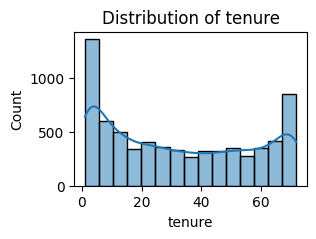

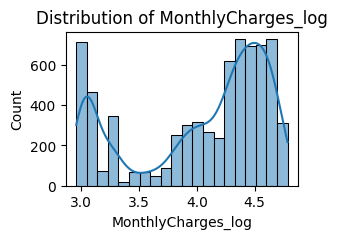

In [72]:
continuous_cols = ['tenure', 'MonthlyCharges_log']

for col in continuous_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(X_features[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

**Shape of the tenure distribution:** 
- The plot is U-shaped or bimodal: there are many customers with either very low or very high tenure.
- The distribution is not normal and contains outliers (in the sense of skewness or heavy tails).

Implication for scaling:
**Shape of the MonthlyCharges_log distribution:** 

- It’s not perfectly symmetrical.
- It shows some skewness and multiple peaks.
- There's a noticeable dip in the middle (i.e., bimodal or multimodal distribution).
- After log transformation, this variable has a more symmetric but still somewhat multimodal distribution.
- The log helped reduce skewness, making the data look more normalized.

In [73]:
# Reset before new model

X_train = X_train_original.copy()
X_test = X_test_original.copy()
y_train = y_train_original.copy()
y_test = y_test_original.copy()

In [74]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
import joblib

# --- Save scaled data ---
joblib.dump(scaler, 'scaler.pkl')  # in modelling.ipynb

['scaler.pkl']

I decided to use RobustScaler because it handles skewed or non-Gaussian data and is resistant to outliers.

## 2. Modelling

Preserving the original data when testing the multiple models so that data leakage, transformation effects, or accidental mutations don’t interfere with the comparisons.

Before training a new model, reset working variables:

#### 2.1. Building A Reusable Pipeline

In [76]:
# --- Imports ---
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# --- instantiate the models ---
lr_classifier = LogisticRegression(random_state=42)
svc_classifier = SVC(kernel='linear', random_state=42)
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
xgb_classifier = XGBClassifier()
cat_classifier = CatBoostClassifier()


# --- Store models in a list ---
models = [lr_classifier, svc_classifier, dt_classifier, 
          rf_classifier, xgb_classifier, cat_classifier]


# --- Train and save models ---
for model in models:
    # Reset the data
    X_train = X_train_original.copy()
    X_test = X_test_original.copy()
    y_train = y_train_original.copy()
    y_test = y_test_original.copy()
    
    model.fit(X_train, y_train)
    
    joblib.dump(model, f'{model.__class__.__name__}.pkl')

    # Save model
    model_name = model.__class__.__name__
    joblib.dump(model, f"{model_name}.pkl")

/Users/eseoseodion/Documents/Portfolio/Customer Churn Prediction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.023974
0:	learn: 0.6796172	total: 57ms	remaining: 56.9s
1:	learn: 0.6684468	total: 59.4ms	remaining: 29.6s
2:	learn: 0.6569509	total: 61.7ms	remaining: 20.5s
3:	learn: 0.6463526	total: 64ms	remaining: 15.9s
4:	learn: 0.6347305	total: 66.9ms	remaining: 13.3s
5:	learn: 0.6243357	total: 69.9ms	remaining: 11.6s
6:	learn: 0.6138311	total: 72.6ms	remaining: 10.3s
7:	learn: 0.6047592	total: 75.6ms	remaining: 9.37s
8:	learn: 0.5958261	total: 78.2ms	remaining: 8.61s
9:	learn: 0.5874491	total: 80.7ms	remaining: 7.99s
10:	learn: 0.5789963	total: 83.5ms	remaining: 7.5s
11:	learn: 0.5703034	total: 85.9ms	remaining: 7.07s
12:	learn: 0.5630031	total: 88.4ms	remaining: 6.71s
13:	learn: 0.5560578	total: 90.8ms	remaining: 6.4s
14:	learn: 0.5503434	total: 93.4ms	remaining: 6.13s
15:	learn: 0.5441389	total: 95.9ms	remaining: 5.9s
16:	learn: 0.5379503	total: 98.6ms	remaining: 5.7s
17:	learn: 0.5320493	total: 101ms	remaining: 5.51s
18:	learn: 0.5259699	total: 103ms	remaining: 5.33s
19